In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [46]:
data = pd.read_csv("C:\\Users\\shrey\\Downloads\\archive\\spam.csv",encoding = 'ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [47]:
data.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [49]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [71]:
import pandas as pd

# Example: Loading a DataFrame (replace this with your actual data loading)
# Create sample data for demonstration
data = pd.DataFrame({
    'Column1': ['spam', 'ham', 'spam', 'ham', 'ham'],
    'Column2': ['Hello', 'World', 'Free entry', 'Joking wif u', 'Dont think so']
})

# Assign proper column names 
data.columns = ['Category', 'Message'] 

# Set the number of rows to display
pd.set_option('display.max_rows', 20)  

# Step 1: Display the DataFrame
print("\nFinal DataFrame:")
print(data.head())  # Display the first few rows

# Option 2: Display the total number of rows and columns
print(f"\nTotal rows and columns: {data.shape}")  

# Option 3: Display a specific range of rows using iloc 
print("\nDisplaying rows from index 5 to 10:")
print(data.iloc[6:13])

# Option 4: Display all rows (be careful with large datasets)
# pd.set_option('display.max_rows', None)  # Uncomment this line to display all rows (not recommended for large datasets)
# print(data)



Final DataFrame:
  Category        Message
0     spam          Hello
1      ham          World
2     spam     Free entry
3      ham   Joking wif u
4      ham  Dont think so

Total rows and columns: (5, 2)

Displaying rows from index 5 to 10:
Empty DataFrame
Columns: [Category, Message]
Index: []


In [72]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [73]:
# Count the occurrences of each category
category_counts = data['Category'].value_counts()

# Display the counts
print(category_counts)


Category
ham     3
spam    2
Name: count, dtype: int64


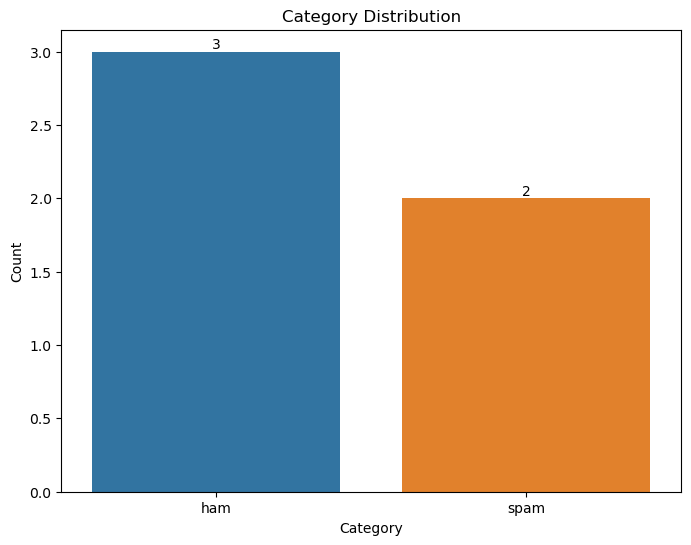

In [74]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [75]:
data['spam']= data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data

,Category,Message,spam
0,spam,Hello,1
1,ham,World,0
2,spam,Free entry,1
3,ham,Joking wif u,0
4,ham,Dont think so,0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(data.Message,data.spam, test_size=0.2)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)

In [78]:
X_train_count

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [79]:
X_test_count = featurer.transform(X_test)
model.score(X_test_count, y_test)

1.0

In [80]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [81]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [82]:
clf.score(X_test,y_test)

1.0

In [83]:
# Pre-trained model
pretrained_model = model 

# New sentence for prediction
new_sentences = [
    "Congratulations! You've won a $500 gift card. Please call 123-456-7890 to claim your prize."
]

# Transform the new sentences using the same feature extraction method
new_sentences_count = featurer.transform(new_sentences)

# Predict whether each sentence is spam (1) or not (0)
predictions = pretrained_model.predict(new_sentences_count)

# Print the results
for sentence, prediction in zip(new_sentences, predictions):
    if prediction == 0:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")


'Congratulations! You've won a $500 gift card. Please call 123-456-7890 to claim your prize.' is a spam message.
